In [1]:
# Librerias a utilizar

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Funciones para visualizacion del resultado
#funciones que nos ayudarán a trazar y visualizar los resultados.

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

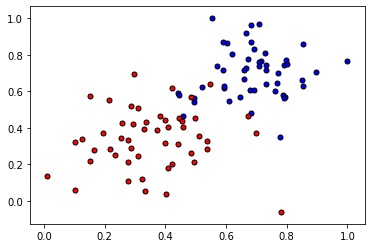

In [18]:
# Importar datos
# cargar datos de un archivo csv
# jupyter datos y codigo tienen que estar en la misma carpeta
data = pd.read_csv('data.csv', header=None)

# De los datos cargados, indicar cual es x, y
X = np.array(data[[0,1]])   # Aca esta el x1, x2
y = np.array(data[2])


plot_points(X,y)
plt.show()

In [4]:
# FUnciones para ejecutar la gradiente descendiente

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
#activando la funcion sigmoidea 

def output_formula(features, weights, bias):
    return sigmoid(np.dot(features, weights) + bias)
#formula para las salidas

def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1-output)
#errores de la formula

def update_weights(x, y, weights, bias, learnrate):
    output = output_formula(x, weights, bias)
    d_error = y - output
    weights += learnrate * d_error * x
    bias += learnrate * d_error
    return weights, bias
#actulizacion de los pesos
#wi⟶wi+α(y−y^)xi 
#b⟶b+α(y−y^)

In [9]:
# Entrenamiento

np.random.seed(44)

epochs = 800 #250,300,200,220
learnrate = 3

def train(features, targets, epochs, learnrate, graph_lines=False):
    
    errors = []  # se va guardar el error
    n_records, n_features = features.shape
    last_loss = None

    # Datos iniciales aleatorios
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    # empezamos con una bia de 0
    bias = 0


    for e in range(epochs):
        del_w = np.zeros(weights.shape)   
        for x, y in zip(features, targets):
            # calculate the output
            output = output_formula(x, weights, bias)
            # calculate the error
            error = error_formula(y, output)  # inicialmente es un valor alto
            # update the weights and bias
            weights, bias = update_weights(x, y, weights, bias, learnrate)
        
        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
            

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()


========== Epoch 0 ==========
Train loss:  0.6292879204134271
Accuracy:  0.52

========== Epoch 25 ==========
Train loss:  0.4793503533463759
Accuracy:  0.85

========== Epoch 50 ==========
Train loss:  0.3983257229656995
Accuracy:  0.92

========== Epoch 75 ==========
Train loss:  0.3472433415080015
Accuracy:  0.93

========== Epoch 100 ==========
Train loss:  0.3123915794589652
Accuracy:  0.93

========== Epoch 125 ==========
Train loss:  0.2871563267012508
Accuracy:  0.93

========== Epoch 150 ==========
Train loss:  0.2680472789021852
Accuracy:  0.93

========== Epoch 175 ==========
Train loss:  0.2530708234663347
Accuracy:  0.93

========== Epoch 200 ==========
Train loss:  0.24101158758700172
Accuracy:  0.93

========== Epoch 225 ==========
Train loss:  0.23108823845612772
Accuracy:  0.93


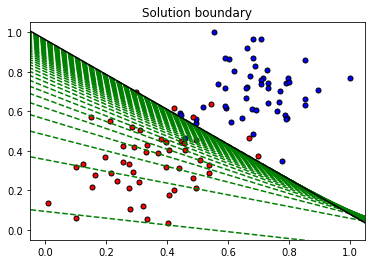

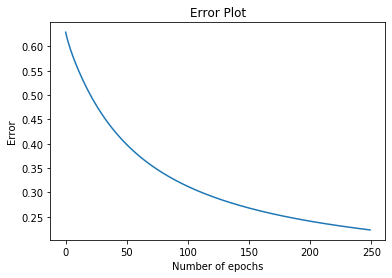

In [27]:
train(X, y, epochs, learnrate, True)
#epochs=300 learnrate=0.05
#la exactirtud no llega aun hasta 1


========== Epoch 0 ==========
Train loss:  0.7204341018578573
Accuracy:  0.36

========== Epoch 25 ==========
Train loss:  0.5289590702889844
Accuracy:  0.8

========== Epoch 50 ==========
Train loss:  0.4266640913741579
Accuracy:  0.93

========== Epoch 75 ==========
Train loss:  0.3649416785874455
Accuracy:  0.94

========== Epoch 100 ==========
Train loss:  0.3242761621014408
Accuracy:  0.94

========== Epoch 125 ==========
Train loss:  0.295599864845164
Accuracy:  0.94

========== Epoch 150 ==========
Train loss:  0.2743172264468735
Accuracy:  0.94

========== Epoch 175 ==========
Train loss:  0.257894217360467
Accuracy:  0.94

========== Epoch 200 ==========
Train loss:  0.24483071758352395
Accuracy:  0.94

========== Epoch 225 ==========
Train loss:  0.23418550779903594
Accuracy:  0.94


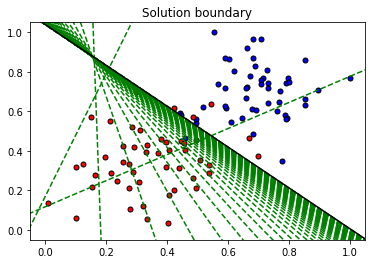

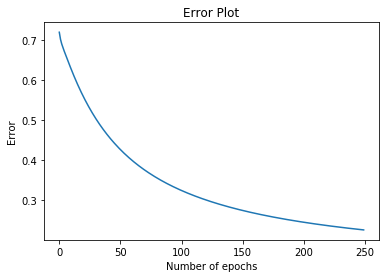

In [28]:
train(X, y, epochs, learnrate, True)
#epochs=200 learnrate=0.94 
#la exactitud no llega aun hasta 1 pero podemos ver que con el aumento del learnrate y la disminusion de la epoca 
#la exactitud tiene una tendencia a subir


========== Epoch 0 ==========
Train loss:  0.6546396839513748
Accuracy:  0.51

========== Epoch 25 ==========
Train loss:  0.4986706157420966
Accuracy:  0.85

========== Epoch 50 ==========
Train loss:  0.40920279599381354
Accuracy:  0.92

========== Epoch 75 ==========
Train loss:  0.35392311704542195
Accuracy:  0.93

========== Epoch 100 ==========
Train loss:  0.3167944693315896
Accuracy:  0.93

========== Epoch 125 ==========
Train loss:  0.29022542745866003
Accuracy:  0.94

========== Epoch 150 ==========
Train loss:  0.2702848469104086
Accuracy:  0.94

========== Epoch 175 ==========
Train loss:  0.2547633538639635
Accuracy:  0.94

========== Epoch 200 ==========
Train loss:  0.24233199681591397
Accuracy:  0.94

========== Epoch 225 ==========
Train loss:  0.23214585661352946
Accuracy:  0.94


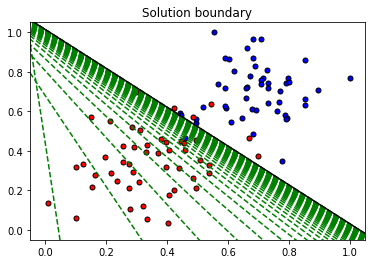

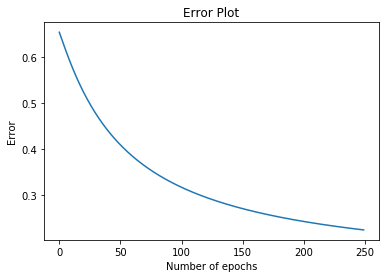

In [33]:
train(X, y, epochs, learnrate, True)
##epochs=1000 learnrate=0.94 
#las lineas tiene un mejor ajuste pero la exactitud no suve 


========== Epoch 0 ==========
Train loss:  0.671512904739012
Accuracy:  0.5

========== Epoch 25 ==========
Train loss:  0.5081367750420239
Accuracy:  0.83

========== Epoch 50 ==========
Train loss:  0.41483164489892693
Accuracy:  0.93

========== Epoch 75 ==========
Train loss:  0.3575992253231355
Accuracy:  0.93

========== Epoch 100 ==========
Train loss:  0.31937564255053785
Accuracy:  0.93

========== Epoch 125 ==========
Train loss:  0.29213798380158645
Accuracy:  0.93

========== Epoch 150 ==========
Train loss:  0.2717604198147752
Accuracy:  0.94

========== Epoch 175 ==========
Train loss:  0.2559376648718652
Accuracy:  0.94

========== Epoch 200 ==========
Train loss:  0.2432896250196933
Accuracy:  0.94

========== Epoch 225 ==========
Train loss:  0.23294222626512148
Accuracy:  0.94


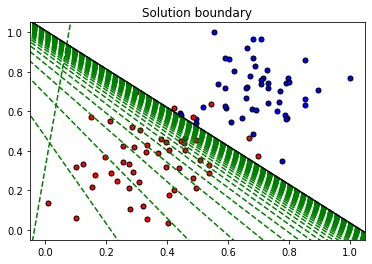

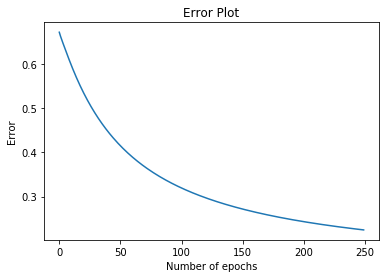

In [34]:
train(X, y, epochs, learnrate, True)
#epoch 325 learnrate 0.98
#el ajuste  de una linea no es perfecta al igual que la exactitud 


========== Epoch 0 ==========
Train loss:  0.7284990434123004
Accuracy:  0.36

========== Epoch 25 ==========
Train loss:  0.5313199652792587
Accuracy:  0.79

========== Epoch 50 ==========
Train loss:  0.4284480509881603
Accuracy:  0.93

========== Epoch 75 ==========
Train loss:  0.36639963248645335
Accuracy:  0.93

========== Epoch 100 ==========
Train loss:  0.32550621285848824
Accuracy:  0.93

========== Epoch 125 ==========
Train loss:  0.29665341749697666
Accuracy:  0.93

========== Epoch 150 ==========
Train loss:  0.27522802810421654
Accuracy:  0.93

========== Epoch 175 ==========
Train loss:  0.25868710903304787
Accuracy:  0.94

========== Epoch 200 ==========
Train loss:  0.24552496381592234
Accuracy:  0.94

========== Epoch 225 ==========
Train loss:  0.23479644254268486
Accuracy:  0.94


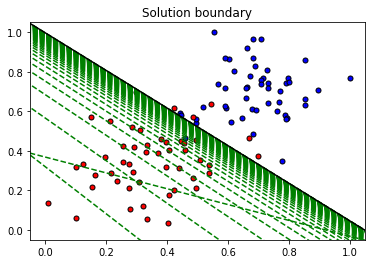

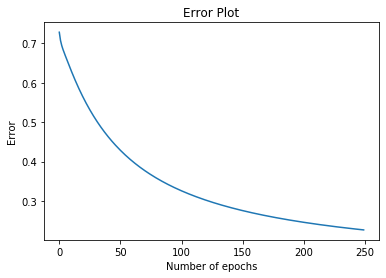

In [35]:
train(X, y, epochs, learnrate, True)
#epoch 800 learnrate 3
#se puede en la grafica que por el aumento del learnrate las lineas tien un mejor ajuste en comparacion a las demas
#la exactitud aun no llega a 1